<a href="https://colab.research.google.com/github/antussa2016/spam_sms_detection/blob/master/spam_sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="ISO-8859-1")


In [129]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4687,ham,Hmmm.but you should give it on one day..,NaN,NaN,NaN
167,ham,"Hi frnd, which is best way to avoid missunders...",NaN,NaN,NaN
3653,ham,Why i come in between you people,NaN,NaN,NaN
323,ham,That would be great. We'll be at the Guild. Co...,NaN,NaN,NaN
3823,ham,I miss you so much I'm so desparate I have rec...,NaN,NaN,NaN


In [130]:
df.shape

(5572, 5)

In [131]:
# 1. data_cleaning
# 2. EDA
# 3. text_preprocessing
# 4. model building
# 5. evaluation
# 6. improvement
# 7. convert to a website


# **Data cleaning**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [133]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [134]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [135]:
df.sample(5)

,target,text
441,ham,You were supposed to wake ME up &gt;:(
3054,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...
1665,ham,Dunno cos i was v late n when i reach they ins...
1227,ham,So Ì_'ll be submitting da project tmr rite?
3139,spam,sexy sexy cum and text me im wet and warm and ...


In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [137]:
df['target'] = encoder.fit_transform(df['target'])

In [138]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [140]:
# check for duplicate values
df.duplicated().sum()

403

In [141]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [142]:
df.duplicated().sum()

0

In [143]:
df.shape

(5169, 2)

# **EDA**

In [144]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

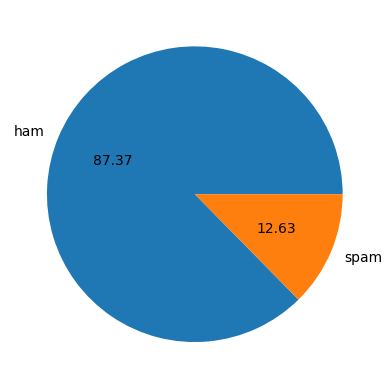

In [146]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [147]:
# Data is imbalanced

In [148]:
import nltk

In [149]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
df['num_characters'] = df['text'].apply(len)

In [151]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [152]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [153]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [154]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [155]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [156]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [157]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [158]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [159]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

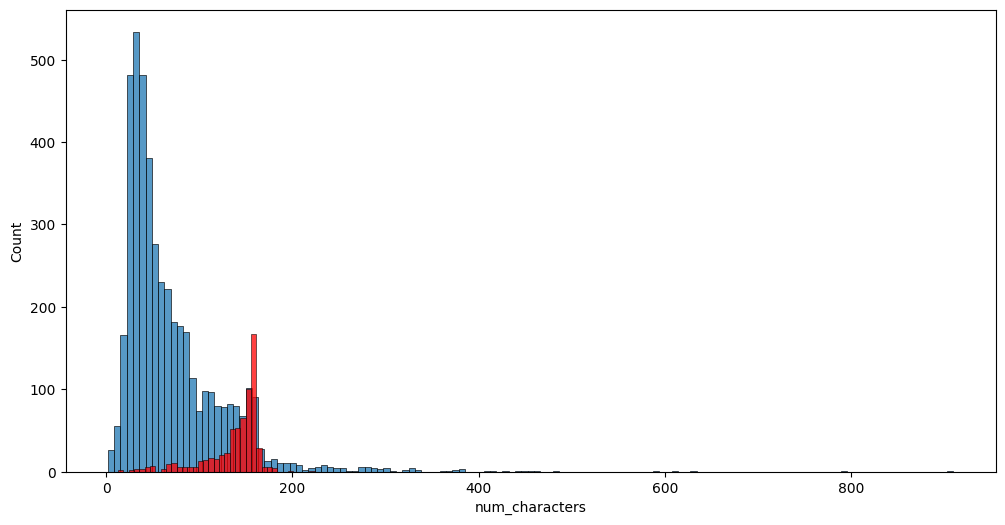

In [160]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

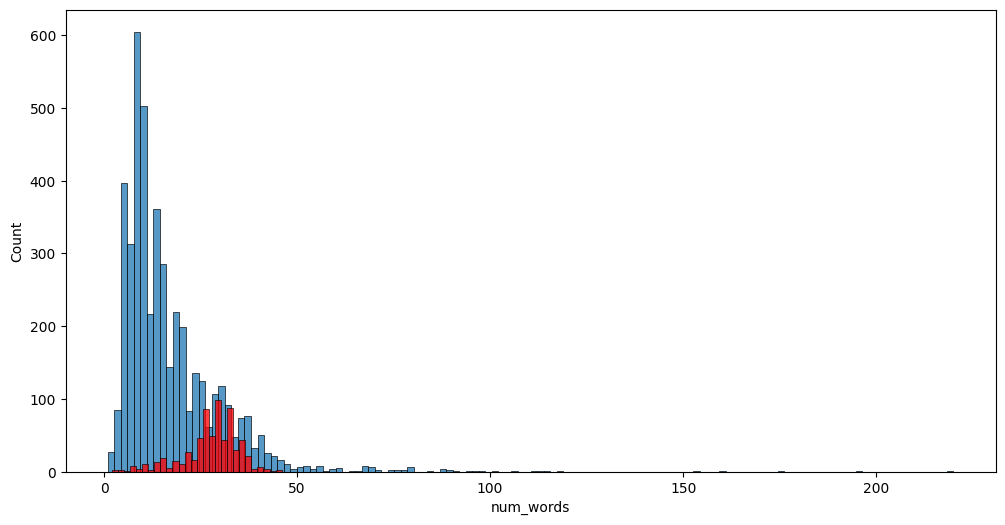

In [161]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

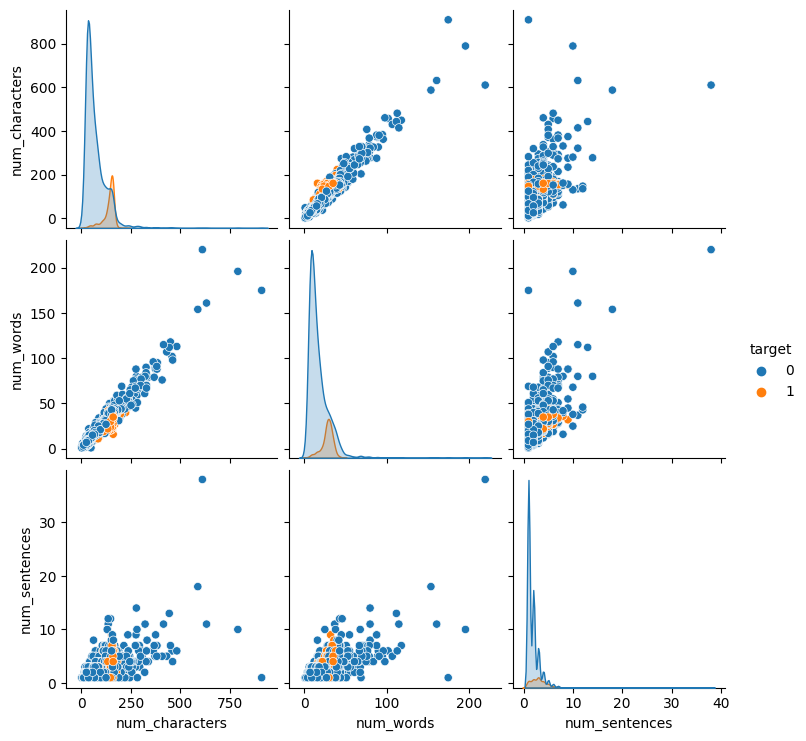

In [162]:
sns.pairplot(df,hue='target')

<ipython-input-163-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

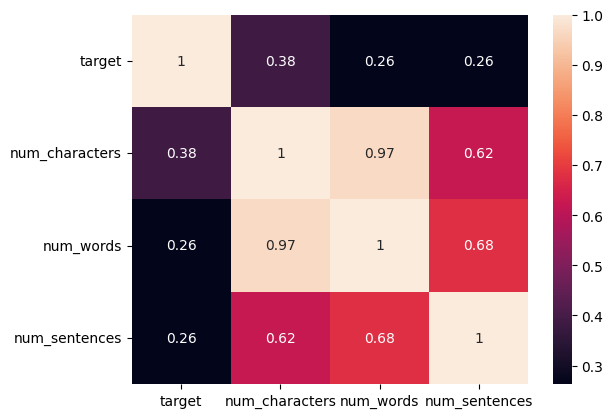

In [163]:
sns.heatmap(df.corr(),annot=True)

# **Data Preprocessing**
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [164]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:


ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [166]:
df['transformed_text'] = df['text'].apply(transform_text)

In [167]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [168]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [169]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

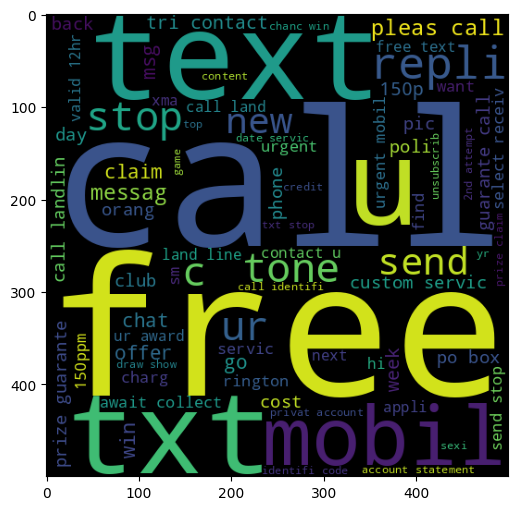

In [170]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [171]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

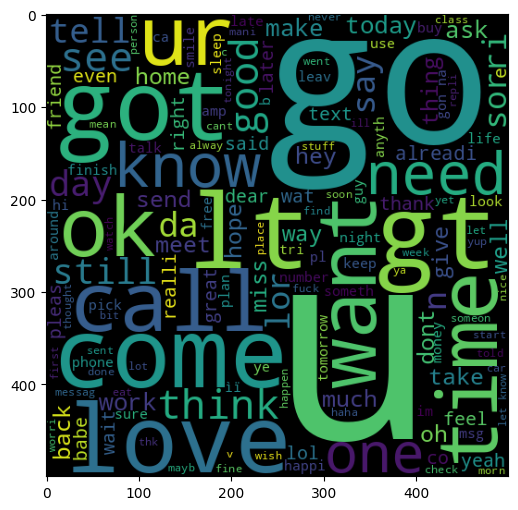

In [172]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [173]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [174]:
len(spam_corpus)

9939

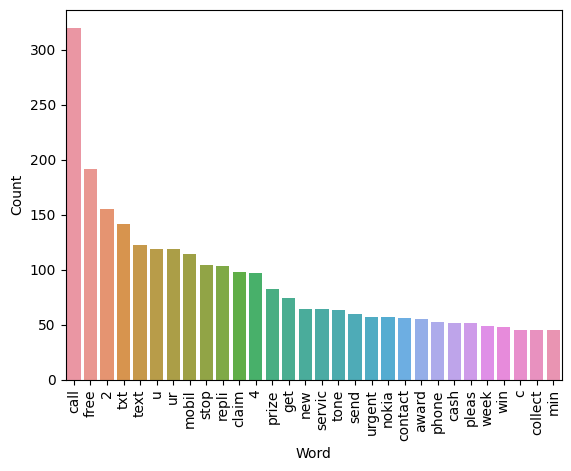

In [175]:
from collections import Counter
word_counts = Counter(spam_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the most common words and counts
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(data=most_common_df, x='Word', y='Count')
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [176]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [177]:
len(ham_corpus)

35404

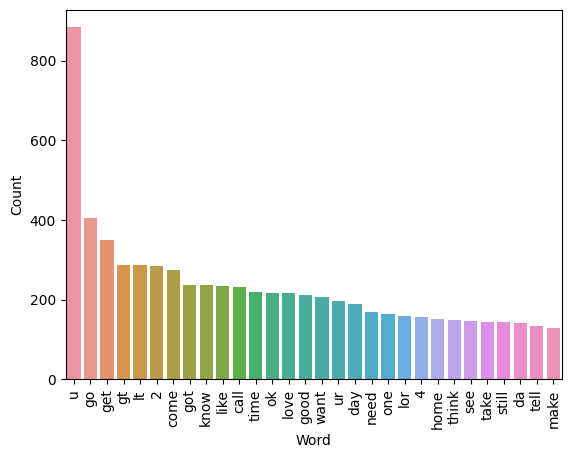

In [178]:
from collections import Counter
word_counts = Counter(ham_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the most common words and counts
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(data=most_common_df, x='Word', y='Count')
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [179]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **Model Building**

In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [181]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [182]:
X.shape

(5169, 3000)

In [183]:
y = df['target'].values

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [186]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [187]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [188]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [189]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [190]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [191]:
# tfidf --> MNB

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [193]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [194]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [195]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [196]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [197]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [213]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),  # Column for classifier names
    'Accuracy': accuracy_scores,  # Column for accuracy scores
    'Precision': precision_scores  # Column for precision scores
})

# Sort the DataFrame by the 'Accuracy' column in descending order
performance_df = performance_df.sort_values(by='Precision', ascending=False)

In [214]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [215]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm', var_name='Score_Type', value_name='Score')

In [216]:
print(performance_df1)

   Algorithm Score_Type     Score
0         KN   Accuracy  0.905222
1         NB   Accuracy  0.970986
2         RF   Accuracy  0.975822
3        SVC   Accuracy  0.975822
4        ETC   Accuracy  0.974855
5         LR   Accuracy  0.958414
6        xgb   Accuracy  0.967118
7   AdaBoost   Accuracy  0.960348
8       GBDT   Accuracy  0.946809
9        BgC   Accuracy  0.958414
10        DT   Accuracy  0.927466
11        KN  Precision  1.000000
12        NB  Precision  1.000000
13        RF  Precision  0.982906
14       SVC  Precision  0.974790
15       ETC  Precision  0.974576
16        LR  Precision  0.970297
17       xgb  Precision  0.933333
18  AdaBoost  Precision  0.929204
19      GBDT  Precision  0.919192
20       BgC  Precision  0.868217
21        DT  Precision  0.811881


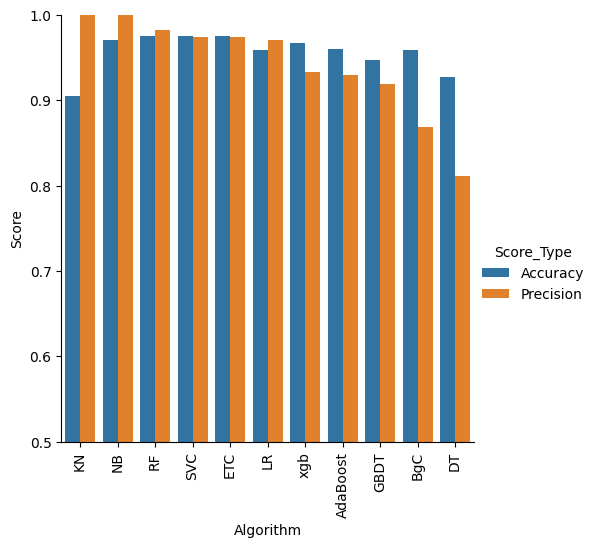

In [217]:
sns.catplot(x = 'Algorithm', y='Score',
               hue = 'Score_Type',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [209]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [218]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_score})

In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values

In [224]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),  # Column for classifier names
    'Accuracy_max_ft_3000': accuracy_scores,  # Column for accuracy scores
    'Precision_max_ft_3000': precision_scores  # Column for precision scores
})


temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),  # Column for classifier names
    'Accuracy_scaling': accuracy_scores,  # Column for accuracy scores
    'Precision_scaling': precision_scores  # Column for precision scores
})
# Sort the DataFrame by the 'Accuracy' column in descending order
performance_df = temp_df.sort_values(by='Precision_scaling', ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')

In [225]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).s

In [227]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),  # Column for classifier names
    'Accuracy_num_chars':accuracy_scores, # Column for accuracy scores
    'Precision_num_chars':precision_scores  # Column for precision scores
})
# Sort the DataFrame by the 'Accuracy' column in descending order
temp_df = temp_df.sort_values(by='Precision_num_chars', ascending=False)

In [228]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
